In [248]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
%matplotlib inline

print(tf.__version__)

# testing that data files are loading properly
datapath = 'data/interpolated'
df = pd.read_csv(datapath + '/paracetamol.csv')
print(df.dtypes.value_counts())
print(df.columns.tolist())
print('length of columns :', len(df.columns.tolist()))
print(df.count())
df.head()

1.12.0
float64    2
object     1
dtype: int64
['2017-01-02', '5.0620465116279085', '1622.4460349504536']
length of columns : 3
2017-01-02            818
5.0620465116279085    818
1622.4460349504536    818
dtype: int64


,2017-01-02,5.0620465116279085,1622.4460349504536
0,2017-01-03,5.062047,4905.684643
1,2017-01-04,4.050100,17063.543608
2,2017-01-05,3.286644,48453.956431
3,2017-01-06,3.132525,63160.945790
4,2017-01-07,3.053567,43530.329993


In [249]:
#choosing current painkiller from the list to make the regression model
CURRENT_SUBSTANCE = '' 

# dictionaries key and value
KEY_PRICE_BASED = "P"
KEY_VOLUME_BASED = "V"

# In total 37 painkillers
ALL_PAINKILLERS_LIST = ['aceclofenac', 'acetylsalicylic-acid', 'benzydamine', 'celecoxib', 'choline-salicylate',
                        'dexibuprofen', 'diacerein', 'diclofenac', 'etodolac', 'etoricoxib', 
                        'feprazone', 'flurbiprofen', 'glucosamine', 'ibuprofen', 'ketoprofen', 
                        'ketorolac', 'lornoxicam', 'mefenamic-acid', 'meloxicam', 'metamizole-sodium', 
                        'nabumetone', 'naproxen', 'nimesulide', 'opium', 'paracetamol', 
                        'penicillamin', 'phenylbutazone', 'piroxicam', 'propyphenazone', 'salicylamide', 
                        'sodium-salicylate', 'tapentadol', 'tenoxicam', 'tilidine', 'tolfenamic-acid',
                        'tramadol', 'viminol']

In [250]:
import glob
all_filenames = glob.glob(datapath+'*/**.csv')
print(all_filenames)

['data\\interpolated\\aceclofenac.csv', 'data\\interpolated\\acetylsalicylic-acid.csv', 'data\\interpolated\\benzydamine.csv', 'data\\interpolated\\celecoxib.csv', 'data\\interpolated\\choline-salicylate.csv', 'data\\interpolated\\dexibuprofen.csv', 'data\\interpolated\\diacerein.csv', 'data\\interpolated\\diclofenac.csv', 'data\\interpolated\\etodolac.csv', 'data\\interpolated\\etoricoxib.csv', 'data\\interpolated\\feprazone.csv', 'data\\interpolated\\flurbiprofen.csv', 'data\\interpolated\\glucosamine.csv', 'data\\interpolated\\ibuprofen.csv', 'data\\interpolated\\ketoprofen.csv', 'data\\interpolated\\ketorolac.csv', 'data\\interpolated\\lornoxicam.csv', 'data\\interpolated\\mefenamic-acid.csv', 'data\\interpolated\\meloxicam.csv', 'data\\interpolated\\metamizole-sodium.csv', 'data\\interpolated\\nabumetone.csv', 'data\\interpolated\\naproxen.csv', 'data\\interpolated\\nimesulide.csv', 'data\\interpolated\\opium.csv', 'data\\interpolated\\paracetamol.csv', 'data\\interpolated\\penici

In [251]:
painkiller_names = []
for csv_file in all_filenames:
    substance = csv_file.split('\\')[-1].split(".")[0]
    print(substance)
    CURRENT_SUBSTANCE = substance
    painkiller_names.append(substance)

assert CURRENT_SUBSTANCE in painkiller_names

aceclofenac
acetylsalicylic-acid
benzydamine
celecoxib
choline-salicylate
dexibuprofen
diacerein
diclofenac
etodolac
etoricoxib
feprazone
flurbiprofen
glucosamine
ibuprofen
ketoprofen
ketorolac
lornoxicam
mefenamic-acid
meloxicam
metamizole-sodium
nabumetone
naproxen
nimesulide
opium
paracetamol
penicillamin
phenylbutazone
piroxicam
propyphenazone
salicylamide
sodium-salicylate
tapentadol
tenoxicam
tilidine
tolfenamic-acid
tramadol
viminol


In [252]:
all_painkiller_dict = {}

# Loading all the painkillers in dictionaries
for csv_file in all_filenames:
    substance = csv_file.split('\\')[-1].split(".")[0]
    print(substance + " | is started to being read")
    try:
        df = df = pd.read_csv(csv_file, header=None)
        dates = df[0]
        prices = df[1]
        volumes = df[2]
    
        all_painkiller_dict[substance] = {}
        all_painkiller_dict[substance][KEY_PRICE_BASED] = prices
        all_painkiller_dict[substance][KEY_VOLUME_BASED] = volumes
    
    except Exception as e:
        print('Error at reading substance | ' + substance)
        print(e)
        break

aceclofenac | is started to being read
acetylsalicylic-acid | is started to being read
benzydamine | is started to being read
celecoxib | is started to being read
choline-salicylate | is started to being read
dexibuprofen | is started to being read
diacerein | is started to being read
diclofenac | is started to being read
etodolac | is started to being read
etoricoxib | is started to being read
feprazone | is started to being read
flurbiprofen | is started to being read
glucosamine | is started to being read
ibuprofen | is started to being read
ketoprofen | is started to being read
ketorolac | is started to being read
lornoxicam | is started to being read
mefenamic-acid | is started to being read
meloxicam | is started to being read
metamizole-sodium | is started to being read
nabumetone | is started to being read
naproxen | is started to being read
nimesulide | is started to being read
opium | is started to being read
paracetamol | is started to being read
penicillamin | is started to

In [253]:
# Test with aceclofenac, paracetamol, ibuprofen
CURRENT_SUBSTANCE = ALL_PAINKILLERS_LIST[24]
print(CURRENT_SUBSTANCE)

paracetamol


In [254]:
all_painkiller_dict[CURRENT_SUBSTANCE]

{'P': 0       5.062047
 1       5.062047
 2       4.050100
 3       3.286644
 4       3.132525
 5       3.053567
 6       3.342180
 7       3.630792
 8       4.238484
 9       4.846176
 10      3.140156
 11      3.877446
 12      3.588089
 13      3.298732
 14      3.009375
 15      3.049000
 16      3.227106
 17      4.401267
 18      2.998000
 19      4.865483
 20      4.702741
 21      4.540000
 22      3.308359
 23      3.141100
 24      3.327278
 25      3.513456
 26      3.679024
 27      3.373144
 28      3.067263
 29      3.216671
          ...    
 789     6.001413
 790     6.136755
 791     6.272096
 792     5.180368
 793     6.167852
 794     4.761712
 795     6.507937
 796     6.254218
 797     6.000499
 798     5.746780
 799     6.435662
 800     6.082712
 801     6.048268
 802     5.266955
 803     6.168095
 804     5.781678
 805     5.395262
 806     6.130351
 807     6.413070
 808     6.278149
 809     5.683550
 810     5.215257
 811     5.706909
 812     6.198561
 813 

In [255]:
df_general = pd.DataFrame.from_dict(all_painkiller_dict[CURRENT_SUBSTANCE])
df_general.head()

,P,V
0,5.062047,1622.446035
1,5.062047,4905.684643
2,4.050100,17063.543608
3,3.286644,48453.956431
4,3.132525,63160.945790


In [256]:
# handle logging
tf.logging.set_verbosity(tf.logging.INFO)

# Calculating Mean Absolute Percentage Error of predictions
def calc_mape(predicted_data, true_data):
    return np.divide(np.sum(np.divide(np.absolute(predicted_data - true_data), true_data), 0), true_data.shape[0])
  
def plot_prediction(original, predicted):
    #fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    # Get subplots
    f, (plt1, plt2, plt3) = plt.subplots(3)
    
    # Get Daily errors
    a = original
    b = predicted
    if(len(original.shape) > 1):
        a = original.reshape(original.shape[0]*original.shape[1])
    
    if(len(predicted.shape) > 1):
        b = predicted.reshape(predicted.shape[0]*predicted.shape[1])
    
    daily_errors = abs(a - b)
  
    t = 7
    weekly_errors = temp = [np.float(np.sum(daily_errors[i:i+t])/t) for i in range(0, len(daily_errors), t)]
  
    # Calculate R2 metric
  
    # FROM wikipedia: 
    # Values of R2 outside the range 0 to 1 can occur when the model fits the data worse than a horizontal hyperplane. 
    # This would occur when the wrong model was chosen.
    
    m = np.mean(a)
    ss_tot = np.sum(np.power((a - m), 2))
    ss_res = np.sum(np.power((a - b), 2))
    r_square = 1 - (ss_res / ss_tot)
    r_square = "{0:.4f}".format(r_square)
    
    mape = calc_mape(b, a)
  
    # Get weekly errors
    # plot original vs predicted  
    plt1.plot(original, 
           color='black', 
           label = 'Original data') 
    
    plt1.plot(predicted,
           color='blue', 
           label = 'Predicted data')

    # PLOT DAILY ERRORS
    plt2.plot(daily_errors, color='red')

    # PLOT WEEKLY ERRORS
    for i, e in enumerate(weekly_errors):
        plt3.bar(x=i*7, height=e, width=5, color='red')

    plt1.set_title('Actual and Predicted - R2: '+str(r_square) + ' - MAPE:'+str(mape))  
    plt2.set_title('Daily Errors')
    plt3.set_title('Weekly Errors')
  
    # IF YOU ARE USING COLAB, USE THIS:
    plt.subplots_adjust(left=1, bottom=1, right=4, top=3, wspace=None, hspace=1)
  
    # IF YOU ARE USING YOUR LOCAL AND SHOWING THE RESULTS USE THE FOLLOWING:
    # plt.subplots_adjust(left=0.05, bottom=0.05, right=0.90, top=0.90, wspace=None, hspace=0.4)
    
    plt.show()

Text(0.5,1,'quantity vs kgPrice')

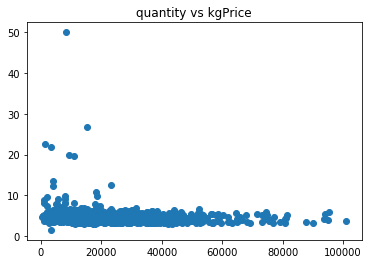

In [257]:
plt.scatter(df_general.V, df_general.P)
plt.title('quantity vs kgPrice')

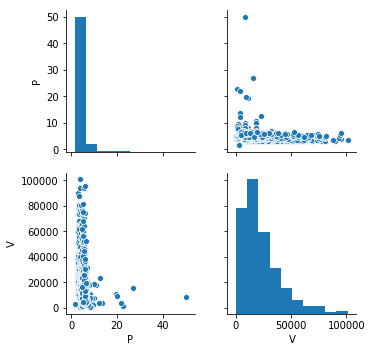

In [258]:
sns.pairplot(df_general)

In [259]:
features = df_general.drop('P', 1)
labels = df_general['P']
#features
#labels

In [260]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.1, random_state = 0, shuffle=False)
#labels_test

In [261]:
train_stats = features_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
V,737.0,23100.846383,17645.942033,383.119125,10835.678257,18383.372358,30113.169888,101099.047769


In [262]:
test_stats = features_test.describe()
test_stats = test_stats.transpose()
test_stats

,count,mean,std,min,25%,50%,75%,max
V,82.0,21926.0738,18519.401447,1688.466866,8726.178697,16667.312634,30121.864457,95272.782422


In [263]:
# data normalization = (x-min)/(max-min) 
def norm(x, stats):
    return (x - stats['min'])/(stats['max'] - stats['min'])

In [264]:
normed_train_data = norm(features_train, train_stats)
normed_test_data = norm(features_test, test_stats)

In [265]:
normtrain = normed_train_data.describe()
normtrain = normtrain.transpose()
normtrain

,count,mean,std,min,25%,50%,75%,max
V,737.0,0.225562,0.175205,0.0,0.103783,0.178723,0.295187,1.0


In [266]:
normtest = normed_test_data.describe()
normtest = normtest.transpose()
normtest

,count,mean,std,min,25%,50%,75%,max
V,82.0,0.21625,0.19789,0.0,0.075202,0.160057,0.303827,1.0


In [267]:
def build_model():
    #create model
    model = keras.Sequential() 
    
    #get number of columns in training data 
    n_cols = normed_train_data.shape[1]
    
    #add model layers
    model.add(layers.Dense(512, activation='relu', input_shape=(n_cols,)))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1))

    optimizer = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [268]:
model = build_model()

In [269]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 512)               1024      
_________________________________________________________________
dense_66 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_67 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_68 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 513       
Total params: 789,505
Trainable params: 789,505
Non-trainable params: 0
_________________________________________________________________


In [270]:
save_model_dir = 'models/'
model_filename = 'regression_basemodel_'+CURRENT_SUBSTANCE+'_interpolated_data_norm.h5'

In [271]:
checkpoint = ModelCheckpoint(filepath=save_model_dir + model_filename, verbose=1, save_best_only=True)
history = model.fit(normed_train_data, labels_train, epochs=1000, batch_size=50, verbose=0, callbacks=[checkpoint], validation_split=0.2)


Epoch 00001: val_loss improved from inf to 31.03189, saving model to models/regression_basemodel_paracetamol_interpolated_data_norm.h5

Epoch 00002: val_loss improved from 31.03189 to 29.36818, saving model to models/regression_basemodel_paracetamol_interpolated_data_norm.h5

Epoch 00003: val_loss improved from 29.36818 to 26.00498, saving model to models/regression_basemodel_paracetamol_interpolated_data_norm.h5

Epoch 00004: val_loss improved from 26.00498 to 19.85204, saving model to models/regression_basemodel_paracetamol_interpolated_data_norm.h5

Epoch 00005: val_loss improved from 19.85204 to 11.21607, saving model to models/regression_basemodel_paracetamol_interpolated_data_norm.h5

Epoch 00006: val_loss improved from 11.21607 to 5.86248, saving model to models/regression_basemodel_paracetamol_interpolated_data_norm.h5

Epoch 00007: val_loss improved from 5.86248 to 5.81518, saving model to models/regression_basemodel_paracetamol_interpolated_data_norm.h5

Epoch 00008: val_los


Epoch 00117: val_loss did not improve from 1.26513

Epoch 00118: val_loss did not improve from 1.26513

Epoch 00119: val_loss did not improve from 1.26513

Epoch 00120: val_loss did not improve from 1.26513

Epoch 00121: val_loss did not improve from 1.26513

Epoch 00122: val_loss did not improve from 1.26513

Epoch 00123: val_loss did not improve from 1.26513

Epoch 00124: val_loss did not improve from 1.26513

Epoch 00125: val_loss did not improve from 1.26513

Epoch 00126: val_loss did not improve from 1.26513

Epoch 00127: val_loss did not improve from 1.26513

Epoch 00128: val_loss did not improve from 1.26513

Epoch 00129: val_loss did not improve from 1.26513

Epoch 00130: val_loss did not improve from 1.26513

Epoch 00131: val_loss did not improve from 1.26513

Epoch 00132: val_loss did not improve from 1.26513

Epoch 00133: val_loss did not improve from 1.26513

Epoch 00134: val_loss did not improve from 1.26513

Epoch 00135: val_loss did not improve from 1.26513

Epoch 00136


Epoch 00277: val_loss did not improve from 1.26513

Epoch 00278: val_loss did not improve from 1.26513

Epoch 00279: val_loss did not improve from 1.26513

Epoch 00280: val_loss did not improve from 1.26513

Epoch 00281: val_loss did not improve from 1.26513

Epoch 00282: val_loss did not improve from 1.26513

Epoch 00283: val_loss did not improve from 1.26513

Epoch 00284: val_loss did not improve from 1.26513

Epoch 00285: val_loss did not improve from 1.26513

Epoch 00286: val_loss did not improve from 1.26513

Epoch 00287: val_loss did not improve from 1.26513

Epoch 00288: val_loss did not improve from 1.26513

Epoch 00289: val_loss did not improve from 1.26513

Epoch 00290: val_loss did not improve from 1.26513

Epoch 00291: val_loss did not improve from 1.26513

Epoch 00292: val_loss did not improve from 1.26513

Epoch 00293: val_loss did not improve from 1.26513

Epoch 00294: val_loss did not improve from 1.26513

Epoch 00295: val_loss did not improve from 1.26513

Epoch 00296


Epoch 00435: val_loss did not improve from 1.26513

Epoch 00436: val_loss did not improve from 1.26513

Epoch 00437: val_loss did not improve from 1.26513

Epoch 00438: val_loss did not improve from 1.26513

Epoch 00439: val_loss did not improve from 1.26513

Epoch 00440: val_loss did not improve from 1.26513

Epoch 00441: val_loss did not improve from 1.26513

Epoch 00442: val_loss did not improve from 1.26513

Epoch 00443: val_loss did not improve from 1.26513

Epoch 00444: val_loss did not improve from 1.26513

Epoch 00445: val_loss did not improve from 1.26513

Epoch 00446: val_loss did not improve from 1.26513

Epoch 00447: val_loss did not improve from 1.26513

Epoch 00448: val_loss did not improve from 1.26513

Epoch 00449: val_loss did not improve from 1.26513

Epoch 00450: val_loss did not improve from 1.26513

Epoch 00451: val_loss did not improve from 1.26513

Epoch 00452: val_loss did not improve from 1.26513

Epoch 00453: val_loss did not improve from 1.26513

Epoch 00454


Epoch 00595: val_loss did not improve from 1.26513

Epoch 00596: val_loss did not improve from 1.26513

Epoch 00597: val_loss did not improve from 1.26513

Epoch 00598: val_loss did not improve from 1.26513

Epoch 00599: val_loss did not improve from 1.26513

Epoch 00600: val_loss did not improve from 1.26513

Epoch 00601: val_loss did not improve from 1.26513

Epoch 00602: val_loss did not improve from 1.26513

Epoch 00603: val_loss did not improve from 1.26513

Epoch 00604: val_loss did not improve from 1.26513

Epoch 00605: val_loss did not improve from 1.26513

Epoch 00606: val_loss did not improve from 1.26513

Epoch 00607: val_loss did not improve from 1.26513

Epoch 00608: val_loss did not improve from 1.26513

Epoch 00609: val_loss did not improve from 1.26513

Epoch 00610: val_loss did not improve from 1.26513

Epoch 00611: val_loss did not improve from 1.26513

Epoch 00612: val_loss did not improve from 1.26513

Epoch 00613: val_loss did not improve from 1.26513

Epoch 00614


Epoch 00754: val_loss did not improve from 1.26513

Epoch 00755: val_loss did not improve from 1.26513

Epoch 00756: val_loss did not improve from 1.26513

Epoch 00757: val_loss did not improve from 1.26513

Epoch 00758: val_loss did not improve from 1.26513

Epoch 00759: val_loss did not improve from 1.26513

Epoch 00760: val_loss did not improve from 1.26513

Epoch 00761: val_loss did not improve from 1.26513

Epoch 00762: val_loss did not improve from 1.26513

Epoch 00763: val_loss did not improve from 1.26513

Epoch 00764: val_loss did not improve from 1.26513

Epoch 00765: val_loss did not improve from 1.26513

Epoch 00766: val_loss did not improve from 1.26513

Epoch 00767: val_loss did not improve from 1.26513

Epoch 00768: val_loss did not improve from 1.26513

Epoch 00769: val_loss did not improve from 1.26513

Epoch 00770: val_loss did not improve from 1.26513

Epoch 00771: val_loss did not improve from 1.26513

Epoch 00772: val_loss did not improve from 1.26513

Epoch 00773


Epoch 00912: val_loss did not improve from 1.26513

Epoch 00913: val_loss did not improve from 1.26513

Epoch 00914: val_loss did not improve from 1.26513

Epoch 00915: val_loss did not improve from 1.26513

Epoch 00916: val_loss did not improve from 1.26513

Epoch 00917: val_loss did not improve from 1.26513

Epoch 00918: val_loss did not improve from 1.26513

Epoch 00919: val_loss did not improve from 1.26513

Epoch 00920: val_loss did not improve from 1.26513

Epoch 00921: val_loss did not improve from 1.26513

Epoch 00922: val_loss did not improve from 1.26513

Epoch 00923: val_loss did not improve from 1.26513

Epoch 00924: val_loss did not improve from 1.26513

Epoch 00925: val_loss did not improve from 1.26513

Epoch 00926: val_loss did not improve from 1.26513

Epoch 00927: val_loss did not improve from 1.26513

Epoch 00928: val_loss did not improve from 1.26513

Epoch 00929: val_loss did not improve from 1.26513

Epoch 00930: val_loss did not improve from 1.26513

Epoch 00931

In [272]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
995,1.706785,1.051093,1.706785,6.775583,1.022115,6.775583,995
996,1.687884,1.040625,1.687884,6.805297,1.039780,6.805297,996
997,1.677283,1.035542,1.677283,6.838870,0.982787,6.838870,997
998,1.531612,0.983784,1.531612,6.889372,1.089174,6.889372,998
999,1.926007,1.132085,1.926007,6.825402,0.987862,6.825402,999


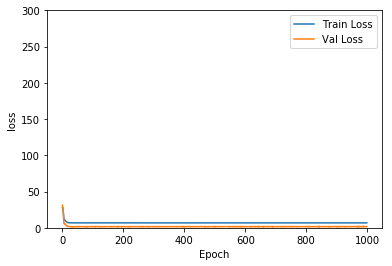

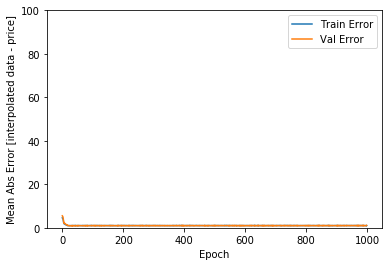

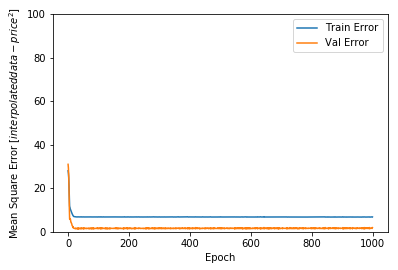

In [273]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Loss')
    
    plt.ylim([0, 300])
    plt.legend()
  
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [interpolated data - price]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0, 100])
    plt.legend()
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$interpolated data - price^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0, 100])
    plt.legend()
  
    plt.show()

plot_history(history)

In [274]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(normed_train_data, labels_train, epochs=1000, batch_size=50, verbose=0, callbacks=[early_stop, checkpoint], validation_split=0.2)


Epoch 00001: val_loss did not improve from 1.26513

Epoch 00002: val_loss did not improve from 1.26513

Epoch 00003: val_loss did not improve from 1.26513

Epoch 00004: val_loss did not improve from 1.26513

Epoch 00005: val_loss did not improve from 1.26513

Epoch 00006: val_loss did not improve from 1.26513

Epoch 00007: val_loss did not improve from 1.26513

Epoch 00008: val_loss did not improve from 1.26513

Epoch 00009: val_loss did not improve from 1.26513

Epoch 00010: val_loss did not improve from 1.26513

Epoch 00011: val_loss did not improve from 1.26513

Epoch 00012: val_loss did not improve from 1.26513

Epoch 00013: val_loss did not improve from 1.26513

Epoch 00014: val_loss did not improve from 1.26513

Epoch 00015: val_loss did not improve from 1.26513

Epoch 00016: val_loss did not improve from 1.26513

Epoch 00017: val_loss did not improve from 1.26513

Epoch 00018: val_loss did not improve from 1.26513

Epoch 00019: val_loss did not improve from 1.26513

Epoch 00020

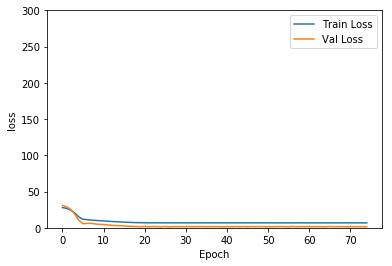

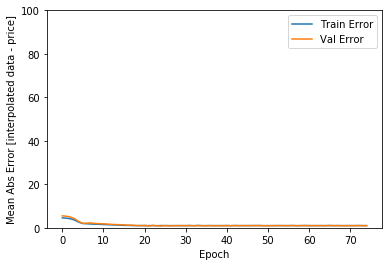

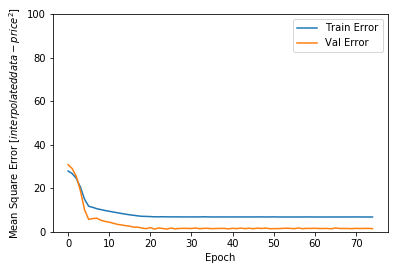

In [276]:
plot_history(history)

In [277]:
loss, mae, mse = model.evaluate(normed_test_data, labels_test, verbose=1)
print("loss: {:5.2f} ".format(loss))
print("mse: {:5.2f} ".format(mse))
print("Testing set Mean Abs Error: {:5.2f} price".format(mae))
#print(loss)

82/82 [==============================] - 0s 4ms/step
loss:  4.86 
mse:  4.86 
Testing set Mean Abs Error:  1.26 price


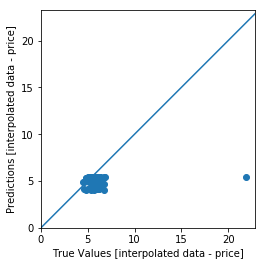

In [278]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(labels_test, test_predictions)
plt.xlabel('True Values [interpolated data - price]')
plt.ylabel('Predictions [interpolated data - price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

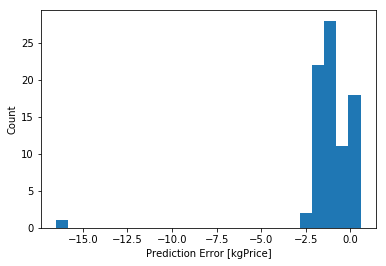

In [279]:
error = test_predictions - labels_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [kgPrice]")
_ = plt.ylabel("Count")

In [280]:
actual = []
for x in range(0, len(labels_test)):
    actual.append(labels_test.iloc[x])

actual = np.asarray(actual, dtype=np.float32)

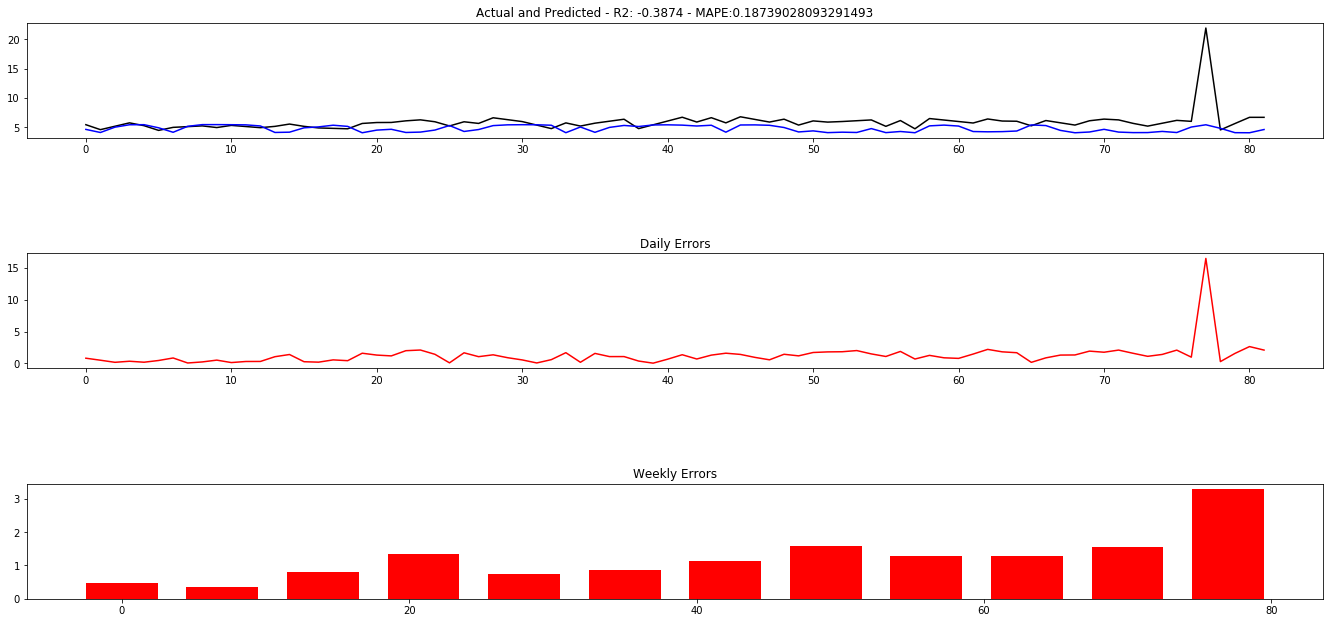

In [281]:
plot_prediction(actual, test_predictions)

In [282]:
test_predictions = model.predict(normed_test_data).flatten()
print("Predicted \t True value")
for x in range(0, len(test_predictions)):
  print("{:.3f} \t\t {:.3f}".format(test_predictions[x], labels_test.iloc[x])) 
  #print("True value: {}".format(labels_test.iloc[x])) 
#print(test_predictions)

Predicted 	 True value
4.657 		 5.459
4.128 		 4.615
5.038 		 5.194
5.449 		 5.773
5.462 		 5.291
4.931 		 4.489
4.167 		 5.005
5.180 		 5.130
5.471 		 5.256
5.472 		 4.972
5.458 		 5.341
5.431 		 5.146
5.243 		 4.950
4.135 		 5.174
4.183 		 5.567
4.927 		 5.176
5.085 		 4.905
5.370 		 4.832
5.172 		 4.759
4.085 		 5.671
4.535 		 5.830
4.676 		 5.841
4.132 		 6.117
4.197 		 6.287
4.545 		 5.960
5.318 		 5.244
4.304 		 5.957
4.632 		 5.677
5.303 		 6.640
5.436 		 6.315
5.458 		 5.990
5.446 		 5.391
5.367 		 4.792
4.095 		 5.767
5.065 		 5.226
4.159 		 5.718
4.998 		 6.054
5.332 		 6.391
5.147 		 4.790
5.416 		 5.438
5.437 		 6.086
5.385 		 6.734
5.235 		 5.913
5.366 		 6.655
4.182 		 5.772
5.410 		 6.809
5.427 		 6.358
5.357 		 5.908
4.981 		 6.402
4.222 		 5.393
4.404 		 6.105
4.106 		 5.901
4.181 		 6.001
4.133 		 6.137
4.794 		 6.272
4.106 		 5.180
4.300 		 6.168
4.088 		 4.762
5.260 		 6.508
5.389 		 6.254
5.226 		 6.000
4.293 		 5.747
4.246 		 6.436
4.277 		 6.083
4.382 		 6.048
5.